In [2]:
# allows the code to be reload automatically, without restarting the whole kernel

%load_ext autoreload
%autoreload 1
%aimport Graph
%aimport BipartiteGraph
%aimport UnipartiteGraph
%aimport TripartiteGraph

from Graph import Graph # import our file 
from BipartiteGraph import BipartiteGraph # import our file 
from UnipartiteGraph import UnipartiteGraph # import our file 
from TripartiteGraph import TripartiteGraph # import our file 

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random 
from guppy import hpy
import sys

from collections import defaultdict
from random import shuffle
from itertools import chain
import time
import random
from collections import Counter
from itertools import chain
import itertools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import queue
q1 = queue.Queue()

In [3]:
yj = {1,2,3,5,6}
sx = {1,2,5}
a  ={6}
yj -sx
yj.add((2,4))
yj

{(2, 4), 1, 2, 3, 5, 6}

In [4]:
yj[1]

TypeError: 'set' object is not subscriptable

In [23]:
yj.intersection()

{(2, 4), 1, 2, 3, 5, 6}

In [40]:
bg =BipartiteGraph.from_file("data/examples/bpse_path.BIP.ORIGIN",separator=" ")

In [11]:
G

--- 0.1490790843963623 seconds ---


,value
nb_vertices,292
nb_edges,3071
density,0.00726823
nb_connected_components,524
degree_avg,10.5171
degree_sum,3071
degree_min,1
degree_max,87


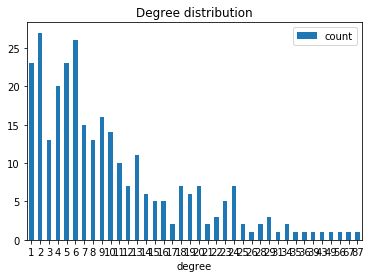

In [13]:
G.analyze(G.bottom)

Counter({3: 198, 5: 60, 4: 122, 2: 299, 1: 717, 6: 31, 7: 8, 8: 8, 17: 4})

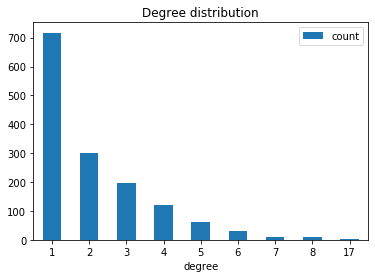

In [18]:
G.get_degree_distribution(G.top)

In [24]:
cm = BipartiteGraph.configuration_model(G.get_all_degrees(G.top),G.get_all_degrees(G.bottom))

--- 0.24245667457580566 seconds ---


,value
nb_vertices,292
nb_edges,3050
density,0.00721852
nb_connected_components,205
degree_avg,10.5171
degree_sum,3071
degree_min,1
degree_max,87


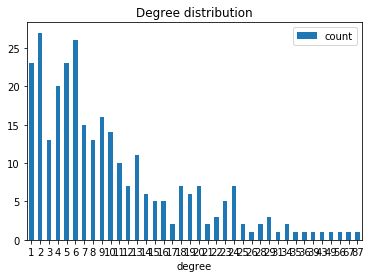

In [25]:
cm.analyze(G.bottom)

 # Test

In [22]:
top = {"A":{1,2},
      "B":{1,2,3,4,5}, 
      "C":{3,4,5,6}}

bottom = {1:{"A","B"},2:{"A","B"},3:{"B","C"},4:{"B","C"},5:{"B","C"},6:{"C"}}

top1 = {"A":{1,2,3},
        "B":{1,2,3}, 
        "C":{2,3}}
    
bottom1 = {1:{"A","B"},
           2:{"A","B","C"},
           3:{"A","B","C"}}

top2 = {"A":{1,2,7},
        "B":{1,2,3,4,5}, 
        "C":{3,4,5,6},
        "D":{1,2,7}}

bottom2 = {1:{"A","B","D"},2:{"A","B","D"},3:{"B","C"},4:{"B","C"},5:{"B","C"},6:{"C"},7:{"A","D"}}

top3 = {"A":{1,2},
        "B":{1,2},
        "C":{1,2},
        "D":{3,2},
        "E":{3,2}}

bottom3 = {1:{"A","B","C"},
        2:{"A","B","C","D"},
        3:{"D","E"}}


top4 = {"A":{1,2},
        "B":{1,2},
        "C":{3,2},
        "D":{3,2}}

bottom4 = {1:{"A","B"},
           2:{"A","B","C","D"},
           3:{"C","D"}}


top5 = {"A":{1,2},
        "B":{1,2,3,4},
        "C":{3,4}}

bottom5 = {1:{"A","B"},
           2:{"A","B"},
           3:{"B","C"},
           4:{"B","C"}}

# bg =BipartiteGraph.from_file("data/examples/bpse_path.BIP.ORIGIN",separator=" ")
bg = BipartiteGraph(top3,bottom3)
detected_or = bg.find_all_maximal()

# detected.remove((frozenset({'A', 'B', 'C', 'D'}), (2,)))
# print("DETECTED",detected_or)
len(detected_or)
detected_or

{frozenset({'B', 'A', 'C'}), frozenset({'D', 'E'}), frozenset({'D', 'B', 'A', 'C'})}


{(('B', 'A', 'C'), (1, 2)), (('D', 'E'), (2, 3))}

In [21]:
# DETECTE LES CHEVAUCHEMENTS

detected = detected_or.copy()
final = set()
final_edges = set()
visited = set()

while detected:
    currenta= random.sample(detected, 1)
    current = currenta[0]
    print(currenta)
    visited.add(current)
    detected.remove(current)
    
    current_top = current[0]
    current_bottom = current[1]
    current_edges = set(itertools.product(current_top, current_bottom))
    
    if not final_edges.intersection(current_edges):
        final.add(current)
        final_edges.update(tuple(current_edges))
#     print("FINAL",final_edges)
        
detected = final
len(detected)

[(('D', 'E'), (2, 3))]
[(('B', 'A', 'C'), (1, 2))]


2

In [168]:
# DETECTE LES NOEUDS QUI FONT "PONTS" ENTRE DEUX BICLIQUES

# detected = detected_or.copy()
count_all = Counter({})
for biclique in detected:
#     print(biclique)
    count_current = Counter(chain.from_iterable(biclique))
#     print(count_current)
    count_all.update(count_current)
    
# for k,v in count_all.items():
#     print(k,v)
    
len(count_all)

647

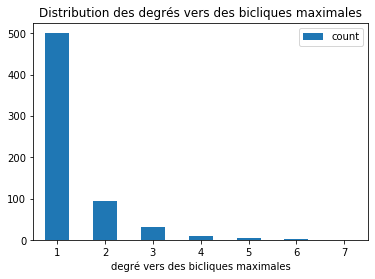

In [170]:
distribution = Counter(count_all.values())

index_name = "degré vers des bicliques maximales"
df_distribution = pd.DataFrame.from_dict(distribution, orient='index').reset_index()
df_distribution.rename(columns={'index':index_name,0:'count'}, inplace=True)
df_distribution.sort_values(by=index_name,ascending=1, inplace=True) # sort the degree by ascending order
ax = df_distribution.plot.bar(x=index_name, y="count", title="Distribution des degrés vers des bicliques maximales", rot=0)


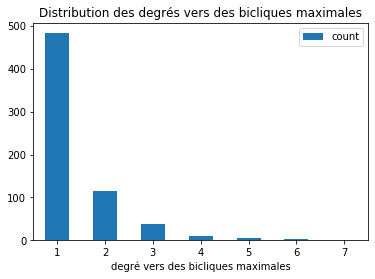

In [162]:
distribution = Counter(count_all.values())

index_name = "degré vers des bicliques maximales"
df_distribution = pd.DataFrame.from_dict(distribution, orient='index').reset_index()
df_distribution.rename(columns={'index':index_name,0:'count'}, inplace=True)
df_distribution.sort_values(by=index_name,ascending=1, inplace=True) # sort the degree by ascending order
ax = df_distribution.plot.bar(x=index_name, y="count", title="Distribution des degrés vers des bicliques maximales", rot=0)


In [16]:
a = set([("C",3)])
b = {('C', 3), ('C', 4), ('C', 5), ('B', 3), ('B', 4), ('B', 5)}
a.intersection(b)
a

{('C', 3)}

In [118]:
# ELIMINE LES BICLIQUES AYANT DES NOEUDS EN COMMUN
detected = detected_or.copy()
final = []
visited = []

count_all = Counter({})
# while len(visited) != len(detected):
while detected:
    currenta= random.sample(detected, 1)
    current = currenta[0]
    print("CURRENT",current)
    visited.append(current)
    detected.remove(current)
    
    count_current = Counter(chain.from_iterable(current))
    print(count_current)
    
#     addition = count_all + dict(count_current)
    addition = Counter({})
    addition.update(count_current)
    addition.update(count_all)
    print(addition)
    
    if len({k:v for k,v in addition.items() if v>1}) != 0:
        pass
    else:
        print("HERE", current)
        final.append(current)
#         count_all = count_all + dict(count_current)
        count_all.update(count_current)
      
final

CURRENT (('A', 'D'), (1, 2, 7))
Counter({'A': 1, 'D': 1, 1: 1, 2: 1, 7: 1})
Counter({'A': 1, 'D': 1, 1: 1, 2: 1, 7: 1})
HERE (('A', 'D'), (1, 2, 7))
CURRENT (('B', 'A', 'D'), (1, 2))
Counter({'B': 1, 'A': 1, 'D': 1, 1: 1, 2: 1})
Counter({'A': 2, 'D': 2, 1: 2, 2: 2, 'B': 1, 7: 1})
CURRENT (('C', 'B'), (3, 4, 5))
Counter({'C': 1, 'B': 1, 3: 1, 4: 1, 5: 1})
Counter({'C': 1, 'B': 1, 3: 1, 4: 1, 5: 1, 'A': 1, 'D': 1, 1: 1, 2: 1, 7: 1})
HERE (('C', 'B'), (3, 4, 5))


[(('A', 'D'), (1, 2, 7)), (('C', 'B'), (3, 4, 5))]

In [59]:
a = Counter(chain.from_iterable(chain.from_iterable(detected)))
len({k:v for k,v in a.items() if v>1})


1

In [86]:
d1 = {1:2}
d2 = {3:2}
d1+d2

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

In [23]:
new_detected = set()

for vertex in bg.top:
    count = 0
    for d in detected:
        if vertex in d[0]:
            count = count+1
            new_detected.add(d)


    print(vertex, count)
    
# print("NEW DETECTED", new_detected)
print("LEN",len(new_detected))
new_detected

A 1
B 1
C 1
D 1
LEN 2


{(frozenset({'A', 'B'}), (1, 2)), (frozenset({'C', 'D'}), (2, 3))}

In [24]:
new_detected2 = set()

for vertex in bg.bottom:
    count = 0
    for d in new_detected:
        if vertex in d[1]:
            count = count+1
            new_detected2.add(d)

#         if count ==1:
#             break
    print(vertex, count)
    
    

    
# print("NEW DETECTED", new_detected)
print("LEN",len(new_detected2))
new_detected

1 1
2 2
3 1
LEN 2


{(frozenset({'A', 'B'}), (1, 2)), (frozenset({'C', 'D'}), (2, 3))}

In [ ]:
new_detected2 = set()

for vertex in bg.bottom:
    count = 0
    for d in new_detected:
        if vertex in d[0]:
            count = count+1
            new_detected2.add(d)

#         if count ==1:
#             break
    print(vertex, count)
    
# print("NEW DETECTED", new_detected)
print("LEN",len(new_detected2))

In [32]:
z = frozenset({'B', 'C'})
"B" in z

True

In [38]:
bg.bottom.keys()

dict_keys([1, 2, 3, 4, 5, 6])

In [40]:
type(set(bg.bottom.keys()))

set

In [51]:
consensus_set = set()
consensus_set.intersection({1,2})

set()

In [53]:
set.intersection({5},{4,5})

{5}

In [92]:
Q = queue.Queue()

In [103]:
Q.put(1)
Q.put(2)
Q.put(3)
Q.put(3)
Q.put(frozenset())

In [104]:
while not Q.empty():
    print(Q.get())

1
2
3
3
frozenset()


In [119]:
S = {frozenset({1,2}),frozenset({1})}
D = frozenset({1,2})

In [14]:
D = frozenset()
D.empty()

AttributeError: 'frozenset' object has no attribute 'empty'

In [ ]:
a = 

In [120]:
S.add(frozenset({2,1}))

In [121]:
S

{frozenset({1}), frozenset({1, 2})}

In [123]:
D in

True

In [125]:
len(S)

2

In [ ]:
a = set{}